In [40]:
# 1) Design Model (input, output, forward pass)
# 2) Construct loss and optimizer
# 3) Training Loop
#  - forward pass: compute prediction
#  - backward pass: compute gradients
#  - update weights

In [41]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

## Data Preparation

In [42]:
# random_state = random noise
X_numpy, Y_numpy = datasets.make_regression(n_samples=100, n_features=1, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
Y = torch.from_numpy(Y_numpy.astype(np.float32))
Y = Y.view(Y.shape[0],1)

In [43]:
n_samples, n_features = X.shape

## Model

In [44]:
input_size = n_features
output_size = 1

In [45]:
model = nn.Linear(input_size, output_size)

## Loss and Optimizer

In [46]:
learning_rate = 0.003

In [47]:
criterion = nn.MSELoss()

In [48]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## Training Loop

In [49]:
num_epochs = 1000

In [50]:
for epoch in range(num_epochs):
    # forward pass and loss
    y_pred = model(X)
    loss = criterion(y_pred,Y)
    # backward pass
    loss.backward()
    # weight update
    optimizer.step()
    optimizer.zero_grad()
    
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch + 1} - loss: {loss.item():.4f}")

Epoch 100 - loss: 1977.5732
Epoch 200 - loss: 770.1043
Epoch 300 - loss: 301.0429
Epoch 400 - loss: 118.0248
Epoch 500 - loss: 46.3744
Epoch 600 - loss: 18.2521
Epoch 700 - loss: 7.1927
Epoch 800 - loss: 2.8372
Epoch 900 - loss: 1.1199
Epoch 1000 - loss: 0.4422


## Plot

In [51]:
predicted = model(X).detach().numpy()

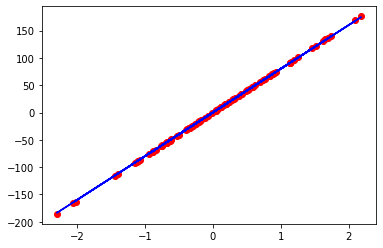

In [52]:
plt.plot(X_numpy,Y_numpy, 'ro')
plt.plot(X_numpy,predicted, 'b')
plt.show()